In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

# Testing Tensor class

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import autodiff.elemental_functions as F

from autodiff.tensor import Tensor

In [6]:
x = Tensor([1, 2, 3])

In [7]:
print(x)

array([1, 2, 3])


In [8]:
y = Tensor([9, 8 , 7])

# arithmetic

In [9]:
x + y

array([10, 10, 10])

In [10]:
x - y

array([-8, -6, -4])

In [11]:
z = Tensor(2)

# reverse mode AD

In [12]:
x1 = Tensor(2)
x2 = Tensor(5)

x1, x2

(array(2), array(5))

In [13]:
y = F.subtract(F.add(F.log(x1), F.multiply(x1, x2)), F.sin(x2))
y

array(11.65207146)

In [14]:
y.backward()

In [15]:
x1.gradient, x2.gradient

(5.5, 1.7163378145367738)

## power

The derivate of $x^2$ should be $2x$

In [16]:
x1 = Tensor([0 ,1 ,2, 3, 4, 5])

In [17]:
y = F.pow(x1, n=2)
y.backward()

y

array([ 0,  1,  4,  9, 16, 25])

In [18]:
x1.gradient

array([ 0,  2,  4,  6,  8, 10])

Text(0.5, 1.0, 'derivative')

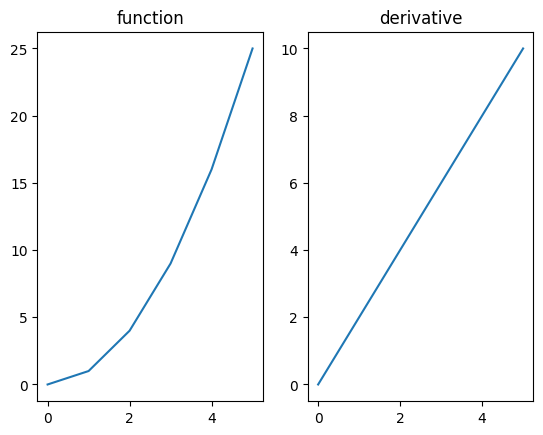

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(x1.value, y.value)
ax2.plot(x1.value, x1.gradient)

ax1.set_title('function')
ax2.set_title('derivative')

## sin

The derivative of $\sin(x)$ should be $\cos(x)$

In [21]:
x1 = Tensor(np.pi * np.linspace(-2, 2))

In [22]:
y = F.sin(x1)
y.backward()

Text(0.5, 1.0, 'derivative')

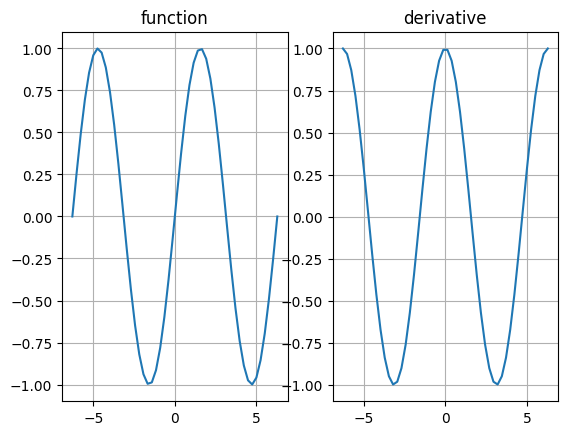

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(x1.value, y.value)
ax2.plot(x1.value, x1.gradient)

ax1.grid()
ax2.grid()

ax1.set_title('function')
ax2.set_title('derivative')

## neural network

In [96]:
data = Tensor(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T)
target = Tensor(np.array([0, 1, 0, 1]))

In [97]:
data

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [98]:
w = []
w.append(Tensor(np.random.rand(3, 2)))
w.append(Tensor(np.random.rand(1, 3)))

In [99]:
import pdb

In [104]:
for i in range(10):
    l1 = F.mm(w[0], data)
    pred = F.mm(w[1], l1)

    loss = F.subtract(pred, target)
    loss = F.mm(loss)
    pass

In [110]:
l1.adjoints

[(array([[0.81899173, 0.72370889],
         [0.66187743, 0.23558586],
         [0.3862387 , 0.72521346]]),
  array([[0, 0, 1, 1],
         [0, 1, 0, 1]])),
 (array([[0, 0, 1, 1],
         [0, 1, 0, 1]]),
  array([[0.81899173, 0.72370889],
         [0.66187743, 0.23558586],
         [0.3862387 , 0.72521346]]))]

In [108]:
pred, target

(array([[0.        , 1.14927036, 1.14451405, 2.29378442]]),
 array([0, 1, 0, 1]))